# Análise de Dados de Passageiros Aéreos com base no Modelo ARIMA

A previsão do número de passageiros aéreos é um problema comercial para todas as companhias aéreas.Uma previsão mais precisa pode ajudar uma empresa a gerenciar o orçamento do próximo ano fiscal, aumentando o lucro e a satisfação dos clientes com os serviços.

# Analise Exploratoria

Os dados fornecidos são do Kaggle: https://www.kaggle.com/datasets/rakannimer/air-passengers. Eles registram o número de passageiros aéreos a cada mês, de janeiro de 1949 a dezembro de 1960.

## Pacotes

In [176]:
pip install pmdarima


In [177]:
pip install pandas openpyxl

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

## Leitura dos dados

In [179]:
Passageiros= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
print(Passageiros)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


Observe que o conjunto de dados possui a quantidade de passageiros por mes e ano, desde 1949 até 1960.

In [180]:
media=np.mean(Passageiros['#Passengers'].values)
print(media)
Passageiros['#Passengers'].values

280.2986111111111


array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [181]:
# Informações gerais
Passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Estatísticas descritivas

In [182]:
print(Passageiros.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


# Análise de Séries Temporais

Definir o data frame como uma serie temporal

In [183]:
print(Passageiros.columns)

Index(['Month', '#Passengers'], dtype='object')


Converter a coluna de datas para datetime

In [184]:
Passageiros['Month'] = pd.to_datetime(Passageiros['Month'])

In [185]:
Passageiros.set_index('Month', inplace=True)

In [186]:
print(Passageiros)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]


In [187]:
serie = pd.Series(Passageiros['#Passengers'])
serie

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


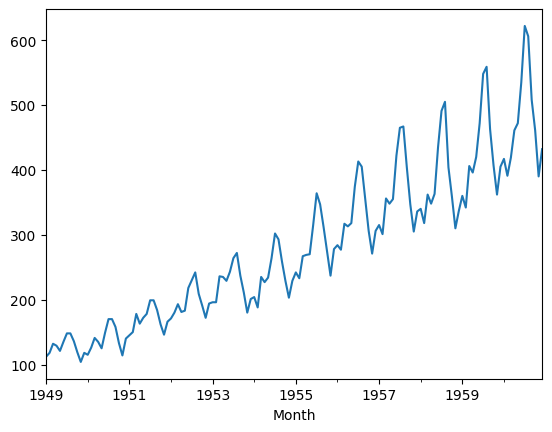

In [188]:
serie.plot()
plt.show()

# Decomposicao

In [189]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [190]:
decomposicao = seasonal_decompose(serie)

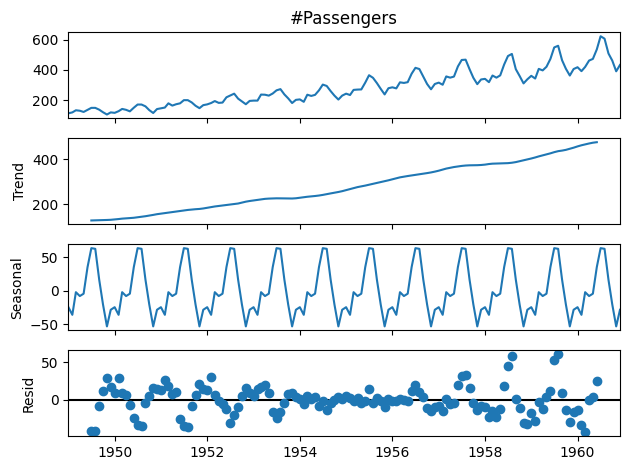

In [191]:
decomposicao.plot()
plt.show()

E possivel visualizar os dados originais a tendencia da serie, a sazonalidade da serie e como se comporta os residuos

# O que significa o Coeficiente Angular?


O coeficiente angular indica a inclinação da linha ajustada aos dados. Em uma série temporal, ele representa a taxa de variação dos valores ao longo do tempo. Por exemplo, se o coeficiente angular for positivo, a série tende a crescer ao longo do tempo; se for negativo, a série tende a decrescer.

In [192]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [193]:
X = np.arange(len(serie)).reshape(-1, 1)
y = serie.values

# Ajustar o modelo de regressão linear
modelo = LinearRegression().fit(X, y)
coeficiente_angular = modelo.coef_[0]
print(f'Coeficiente Angular: {coeficiente_angular}')

Coeficiente Angular: 2.6571839080459774


É possivel visualizar o coeficiente Angular de 2.66, isso implicaria que, em média, o número de passageiros está aumentando em 2.66 unidades a cada período de tempo. O que confirma a tendencia crescente visualizada na decomposição.

# Media Movel

In [194]:
media_movel = serie.rolling(window=3)
media_movel = media_movel.mean()
print(media_movel)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
                 ...    
1960-08-01    587.666667
1960-09-01    578.666667
1960-10-01    525.000000
1960-11-01    453.000000
1960-12-01    427.666667
Name: #Passengers, Length: 144, dtype: float64


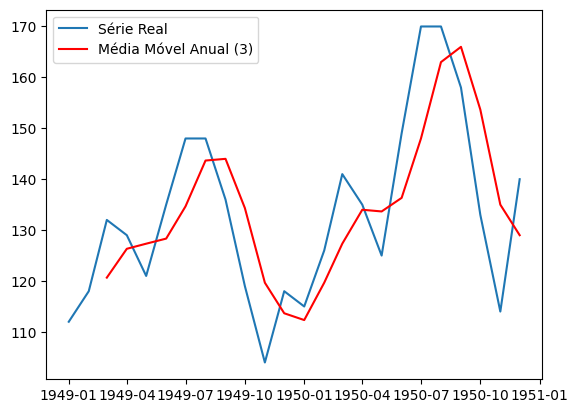

In [195]:
plt.plot(serie.iloc[:24] , label='Série Real')
plt.plot(media_movel.iloc[:24],color='red', label='Média Móvel Anual (3)')
plt.legend(loc='best')
plt.show()

É possível observar a volatilidade no número de passageiros ao longo do ano:

1. Crescimento nos primeiros três meses: Aumento das viagens pós-festas de fim de ano.

2. Decaimento até o mês 5: Menor demanda após o período de férias.

3. Crescimento entre os meses 6 e 7: Alta temporada de viagens durante o verão.

4. Nova queda após o verão: Diminuição nas viagens entre agosto e outubro.

5. Crescimento em novembro e dezembro: Aumento nas viagens devido às festas de fim de ano.

Essas oscilações refletem a volatilidade sazonal típica no número de passageiros ao longo do ano.

# Estacionariedade

## Normalidade da Serie

In [196]:
import scipy.stats as stats

In [197]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9519577090493235
p-valor: 6.832415574230719e-05


Como o p-valor é muito menor que o nível de significância comum de 0.05 (ou 5%), você rejeita a hipótese nula. Isso sugere que os dados da sua série temporal não seguem uma distribuição normal.

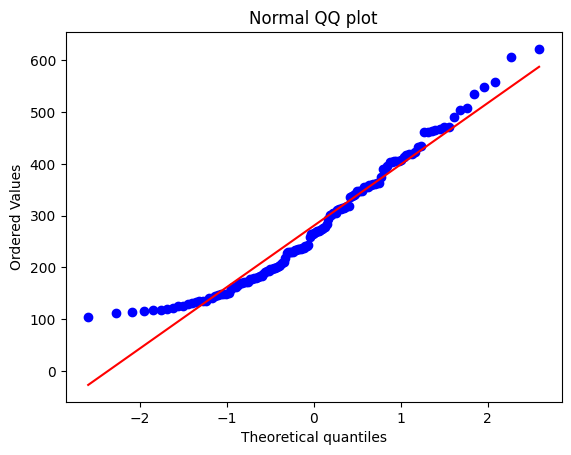

In [198]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Distribuicao da Serie

<ipython-input-199-f5be188b270d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie)


<Axes: xlabel='#Passengers', ylabel='Density'>

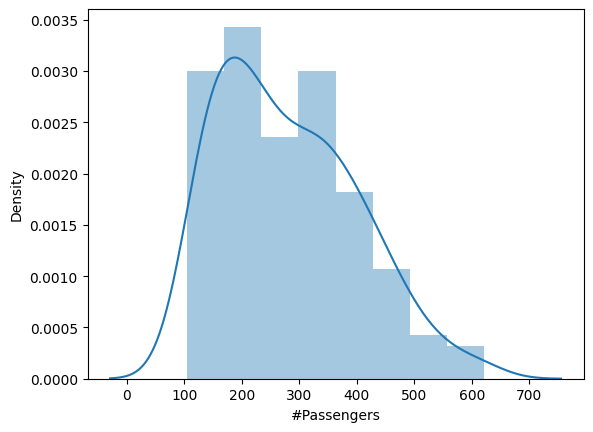

In [199]:
import seaborn as sns
sns.distplot(serie)

## Teste Estacionariedade

In [200]:
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller, acf, pacf

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = é estacionária: estatística do teste < valores críticos (P.valor>Snível de significância)

H1 = não é estacionária: estatística do teste > valores crítico. (P.valor<nível de significância)

In [201]:
import statsmodels.tsa.stattools
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6513
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-201-32ed56d38182>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie)


Como 1.65 é maior que os valores criticos, temos que a serie original não é estacionaria.

Teste de Dickey-Fuller Aumentado

H0 = não é estacionária:  p.valor > nível significancia

H1 = é estacionária:  p.valor < nível significancia

In [202]:
# Teste de Dickey-Fuller Aumentado
result = adfuller(serie)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


Logo, não rejeitamos H0 e concluimos que a serie original é nao estacionaria, no teste ADF.

Ambos os teste concluiram que a serie original, é não estacionaria, portanto iremos prosseguir para transformações na serie.


plot_acf(serie3, lags=20)
plt.show()

# Autocorrelação e Autocorrelação Parcial

Os gráficos de Autocorrelação (ACF) e Autocorrelação Parcial (PACF) são úteis para identificar a estrutura de autocorrelação de uma série temporal.

In [203]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

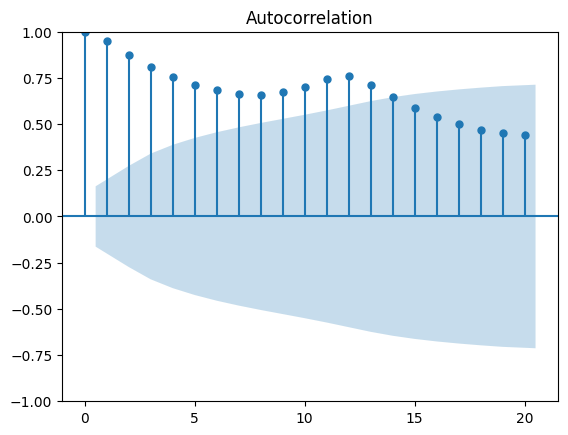

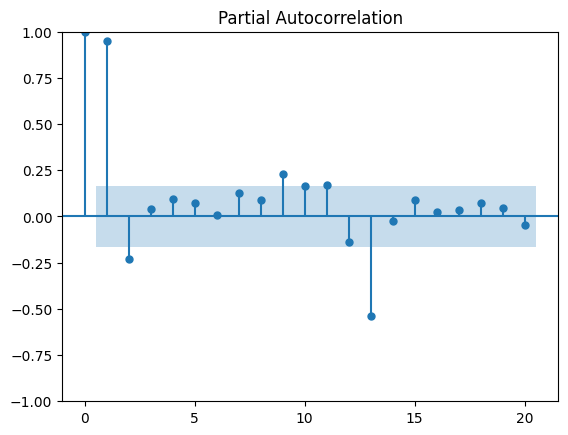

In [204]:
plot_acf(serie, lags=20)
plt.show()
plot_pacf(serie, lags=20)
plt.show()

# Diferenciação

In [205]:
serie_diferenciada = serie.diff()
serie_diferenciada

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


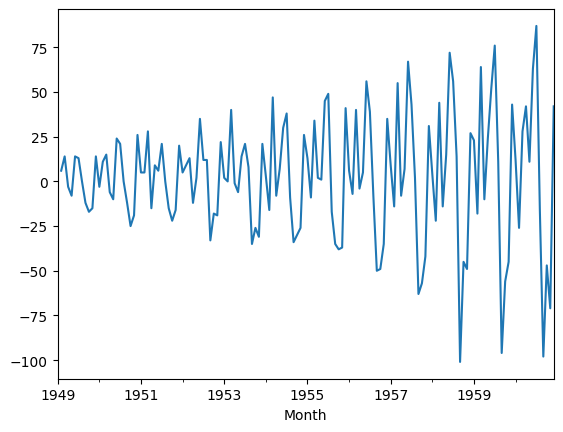

In [206]:
serie_diferenciada.plot()
plt.show()

# Refazendo Teste de Estacionariedade

In [207]:
serie_diferenciada.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


Observe que possui o primeiro valor "Nan", devido a diferenciação, iremos remover para poder continuar nos testes.

In [208]:
serie_diferenciada = serie_diferenciada.drop(index = serie_diferenciada.index[0])
serie_diferenciada.head()

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = é estacionária: estatística do teste < valores críticos (P.valor>Snível de significância)

H1 = não é estacionária: estatística do teste > valores crítico. (P.valor<nível de significância)

In [209]:
kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0239
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-209-ea2d104be05a>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)


Teste de Dickey-Fuller Aumentado

H0 = não é estacionária:  p.valor > nível significancia

H1 = é estacionária:  p.valor < nível significancia

In [210]:
# Teste de Dickey-Fuller Aumentado
result = adfuller(serie_diferenciada)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


# Conclusao Diferenciação

Ambos os testes concluiram que a serie com a diferenciação é estacionaria. Iremos prosseguir para Previsão.


# **REVERSÃO DA DIFERENCIAÇÃO**

## Modelo

In [211]:
pip install pmdarima

In [212]:
from pmdarima.arima import auto_arima

In [213]:
modelo_auto = auto_arima(serie_diferenciada, trace = True, stepwise = False, seasonal=True, max_p=8, max_q=8,
                          max_P=3, max_Q=3, start_p=0, start_q=0, start_P=0, start_Q=0, m=6)

 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=1415.278, Time=0.13 sec
 ARIMA(0,0,0)(0,0,1)[6] intercept   : AIC=1416.929, Time=0.46 sec
 ARIMA(0,0,0)(0,0,2)[6] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(0,0,3)[6] intercept   : AIC=inf, Time=7.20 sec
 ARIMA(0,0,0)(1,0,0)[6] intercept   : AIC=1416.265, Time=1.01 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=1360.351, Time=0.64 sec
 ARIMA(0,0,0)(1,0,2)[6] intercept   : AIC=1276.747, Time=1.94 sec
 ARIMA(0,0,0)(1,0,3)[6] intercept   : AIC=1255.056, Time=11.37 sec
 ARIMA(0,0,0)(2,0,0)[6] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=1156.674, Time=2.54 sec
 ARIMA(0,0,0)(2,0,2)[6] intercept   : AIC=1156.780, Time=2.69 sec
 ARIMA(0,0,0)(2,0,3)[6] intercept   : AIC=1158.659, Time=9.47 sec
 ARIMA(0,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=5.69 sec
 ARIMA(0,0,0)(3,0,1)[6] intercept   : AIC=1158.464, Time=1.34 sec
 ARIMA(0,0,0)(3,0,2)[6] intercept   : AIC=1158.731, Time=1.28 sec
 ARIMA(0,0,1)(0,0,0)[6] inter

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(3,0,0)[6] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packag

 ARIMA(2,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(0,0,0)[6] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,1)[6] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,0,1)(0,0,2)[6] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(2,0,1)(1,0,0)[6] intercept   : AIC=1360.311, Time=2.55 sec
 ARIMA(2,0,1)(1,0,1)[6] intercept   : AIC=1289.000, Time=0.86 sec
 ARIMA(2,0,1)(2,0,0)[6] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=1343.777, Time=0.85 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=1323.716, Time=0.86 sec
 ARIMA(2,0,3)(0,0,0)[6] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[6] intercept   : AIC=1396.151, Time=0.13 sec
 ARIMA(3,0,0)(0,0,1)[6] intercept   : AIC=1396.043, Time=0.23 sec
 ARIMA(3,0,0)(0,0,2)[6] intercept   : AIC=1294.529, Time=0.59 sec
 ARIMA(3,0,0)(1,0,0)[6] intercept   : AIC=1389.229, Time=0.47 sec
 ARIMA(3,0,0)(1,0,1)[6] intercept   : AIC=1321

In [214]:
resultado_auto = modelo_auto.fit(serie_diferenciada)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 6)   Log Likelihood                -568.886
Date:                            Fri, 16 Aug 2024   AIC                           1147.773
Time:                                    16:33:10   BIC                           1162.587
Sample:                                02-01-1949   HQIC                          1153.793
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0835      0.632      0.132      0.895      -1.156       1.323
ma.L1         -0.2671      0.072   

# Resumo do Modelo
Modelo Ajustado: SARIMAX(0, 0, 3)x(2, 0, [], 6)
Observações: 141
Parâmetros Principais:
MA (Moving Average): Significativo para os lags 1 e 3.
AR Sazonal: Significativo para o lag 12.
Métricas de Ajuste
Log Likelihood: -558.993
AIC: 1131.987
BIC: 1152.628
HQIC: 1140.375
Essas métricas ajudam a avaliar a qualidade do ajuste do modelo, com valores menores indicando um melhor ajuste.

Diagnóstico dos Resíduos
Ljung-Box (L1): p-valor de 0.66 sugere que o modelo não apresenta autocorrelação residual significativa.
Jarque-Bera: p-valor de 0.08 indica que os resíduos seguem aproximadamente uma distribuição normal.
Heterocedasticidade: p-valor <0.001 sugere que há heterocedasticidade nos resíduos, indicando variações na variância dos erros.

O modelo SARIMAX se ajusta bem aos dados, com vários parâmetros significativos e boa capacidade de ajuste. No entanto, há sinais de heterocedasticidade que podem exigir ajustes adicionais. A avaliação diagnóstica é promissora, mas o modelo pode ser aprimorado para garantir previsões ainda mais robustas.

## Previsao Proximo Ano

In [215]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

,0
1961-01-01,12.329102
1961-02-01,-24.659991
1961-03-01,27.797703
1961-04-01,40.728523
1961-05-01,11.272266
1961-06-01,60.008967
1961-07-01,83.260756
1961-08-01,-15.006045
1961-09-01,-93.996540
1961-10-01,-45.290290


## Reversão

In [216]:
# Usando o último elemento da série não diferenciada e somando com o primeiro elemento da previsão
s = serie[len(serie)-1]+previsao_auto[0]
s

<ipython-input-216-942ef1f3a87b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s = serie[len(serie)-1]+previsao_auto[0]


444.3291022848762

In [217]:
c = 1
previsao_revertida = [s]
while c < len(previsao_auto):
    s = s + previsao_auto[c]
    previsao_revertida.append(s)
    c = c + 1

<ipython-input-217-73f13647c04d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s = s + previsao_auto[c]


In [218]:
previsao_revertida = pd.DataFrame(previsao_revertida)
previsao_revertida

,0
0,444.329102
1,419.669111
2,447.466814
3,488.195337
4,499.467603
5,559.476571
6,642.737327
7,627.731282
8,533.734742
9,488.444452


# Visualização Previsão

In [219]:
dex = range(144, len(previsao_revertida) + 144)
previsao_revertida

,0
0,444.329102
1,419.669111
2,447.466814
3,488.195337
4,499.467603
5,559.476571
6,642.737327
7,627.731282
8,533.734742
9,488.444452


In [220]:
seriecomprevisao = pd.concat([serie, previsao_revertida], axis=0,ignore_index=True)
print(seriecomprevisao)

              0
0    112.000000
1    118.000000
2    132.000000
3    129.000000
4    121.000000
..          ...
151  627.731282
152  533.734742
153  488.444452
154  420.450056
155  460.187376

[156 rows x 1 columns]


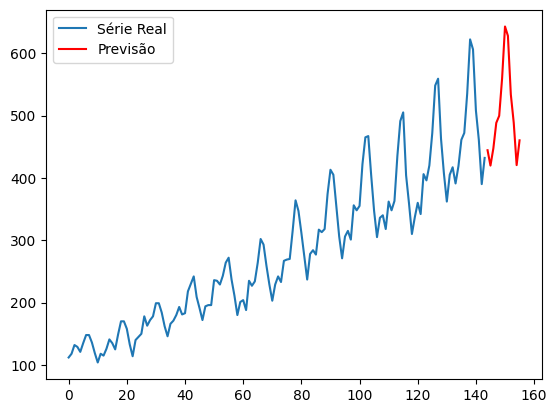

In [221]:
plt.plot(seriecomprevisao.iloc[0:144], label='Série Real')
plt.plot(seriecomprevisao.iloc[144:],color='red', label='Previsão')
plt.legend(loc='best')
plt.show()

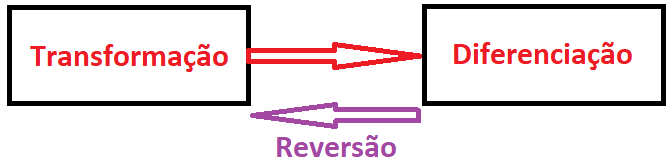